# Machine Learning workshop

In this workshop, we will study GSE53987 dataset on Bipolar disorder (BD) and major depressive disorder (MDD) and schizophrenia. You can download it [here](https://github.com/BRITE-REU/programming-workshops/blob/master/source/workshops/04_Machine_learning/data/GSE53987_combined.csv).

In total there are 205 rows consisting of 19 individuals diagnosed with BPD, 19 with MDD, 19 schizophrenia and 19 controls. Each sample has gene expression from 3 tissues (post-mortem brain). There are a total of 13768 genes (numeric features) and 10 meta features and 1 ID (GEO sample accession).

- Age
- Race (W for white and B for black)
- Gender is F for female and M for male
- Ph is the ph of the brain tissue
- Pmi is the post mortal interval
- Rin is the RNA integrity number
- Patient is unique for each patient. Each patient has up to 3 tissue samples. The patient ID is written as disease followed by a number from 1 to 19
- Tissue is the tissue the expression was obtained from.
- Disease.state is the class of disease the patient belongs to: bipolar, schizophrenia, depression or control.
- source.name is the combination of th etissue and disease.state

In [11]:
%matplotlib notebook
import pandas as pd
import seaborn as sns

In [2]:
# load data
data = pd.read_csv("../data/GSE53987_combined.csv", index_col=0)

In [3]:
data.head()

,Patient,Source.name,Age,Gender,Race,Pmi,Ph,Rin,Tissue,Disease.state,...,ZSWIM8.AS1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYX,ZZEF1,ZZZ3
GSM1304852,bipolar_10,"hippocampus, bipolar disorder",52,M,W,23.5,6.7,6.3,hippocampus,Bipolar disorder,...,5.985163,6.428342,3.909310,6.046175,4.277563,4.107621,6.688651,7.228978,5.891636,7.982137
GSM1304853,bipolar_11,"hippocampus, bipolar disorder",50,F,W,11.7,6.4,6.8,hippocampus,Bipolar disorder,...,6.177670,6.537507,4.552976,7.335697,4.358375,4.132819,6.475851,7.028054,5.905446,7.891166
GSM1304854,bipolar_12,"hippocampus, bipolar disorder",28,F,W,22.3,6.3,7.7,hippocampus,Bipolar disorder,...,5.544327,6.732762,5.078011,7.470260,4.405250,4.137028,6.020157,6.810143,5.610422,7.940210
GSM1304855,bipolar_13,"hippocampus, bipolar disorder",55,F,W,17.5,6.4,7.6,hippocampus,Bipolar disorder,...,5.978466,6.913840,4.864570,7.175861,4.206593,4.005465,6.586425,6.818529,5.769763,7.987298
GSM1304856,bipolar_14,"hippocampus, bipolar disorder",58,M,W,27.7,6.8,7.0,hippocampus,Bipolar disorder,...,6.138507,6.756435,4.203565,7.032669,4.284513,4.128175,6.633143,7.037504,5.926310,8.002489


## Task 1

Check all the features. Which features are numeric, which are categorical? Understanding the nature of your data is a very important and necessary first step before proceeding with any analysis.

- What type of distributions exist within the features? Is Gender a balanced feature (roughly equal representation between both men and women)? Are numerical values normally distributed? Explore numerical distributions by plotting histograms for Age, an Age + Gender histogram, and one of your favorite genes found in the dataset.

- Some features display factor dependent values. That is, whether a subject is a male or a female might effect the expression patterns of a given gene. Explore factor and feature relationships by creating boxplots for three different features grouped by Tissue, Disease.status, and combining the two. If we want to predict factor/group membership (e.g. tissue of origin), what types of boxplots would we expect to see from a predictive feature?


<IPython.core.display.Javascript object>


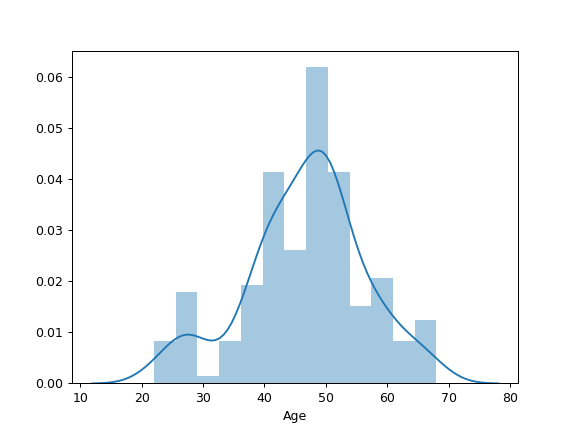

In [15]:
# Histogram of the age
sns.distplot(data["Age"])

<IPython.core.display.Javascript object>


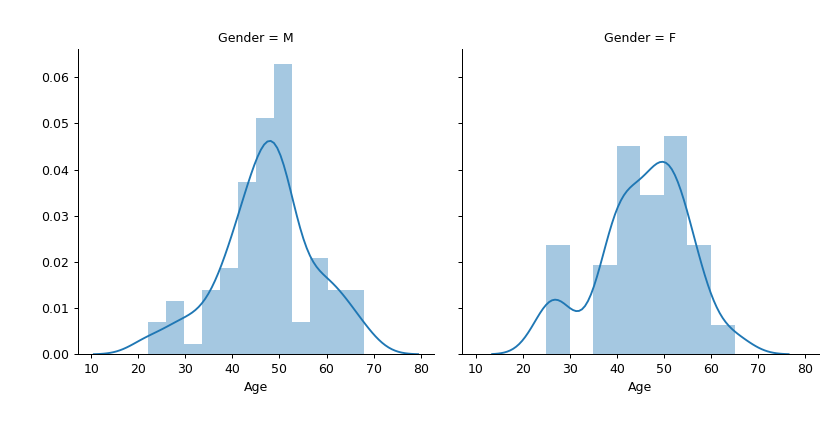

In [20]:
# Histogram of the Age faceted by Gender
g = sns.FacetGrid(data, col="Gender", margin_titles=True)
g.map(sns.distplot, "Age")

In [8]:
# Histogram of gene expression

<IPython.core.display.Javascript object>


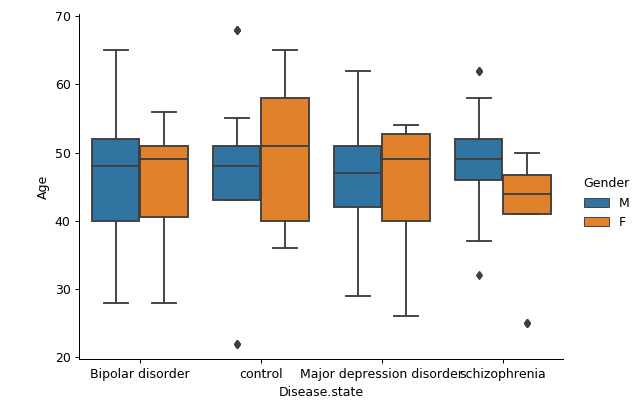

In [28]:
# Boxplot
sns.catplot(data=data, x="Disease.state", y="Age", hue="Gender", kind="box")

<IPython.core.display.Javascript object>


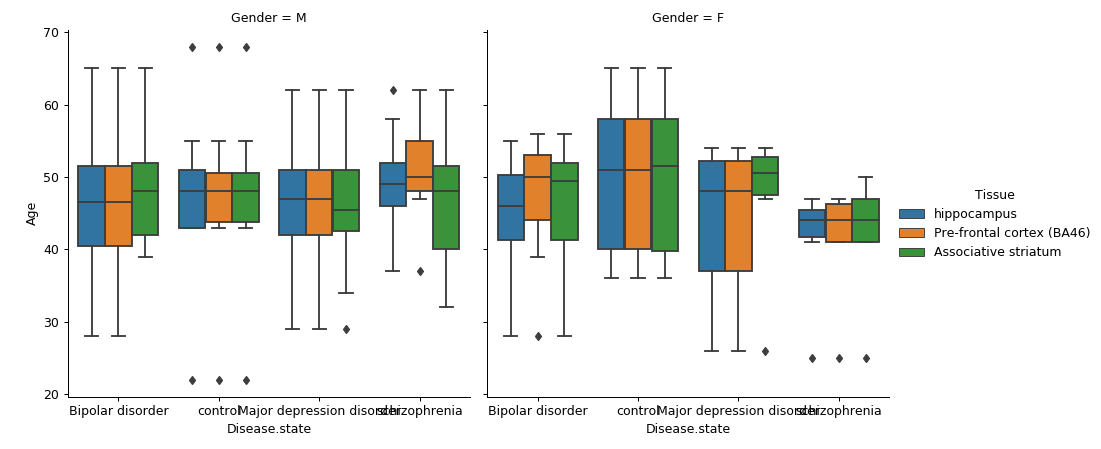

In [30]:
sns.catplot(data=data, x="Disease.state", y="Age", hue="Tissue", col="Gender", kind="box")

## Task 2

Principal Component Analysis (PCA) is a commonly used technique to create linearly uncorrelated features from a set of possibly correlated features. The procedure is done in such a way that the first feature produced by PCA, the first principal component – PC1, explains the largest amount of variability possible. In this way, PCA is a dimension reduction technique, as the first few principal components often explain upwards of 90% of the variability found within a dataset. It is important to note that if we’re planning on predicting anything using the principal components, such as tissue type or Disease.status, those features should not be included in the input matrix. Before performing PCA, create a new data frame containing only explanatory values (i.e. the features we want to use to predict class membership).

- Explore how much variation is explained by the principal components. How much variation is explained by the first two principal components? How many principal components are required to explain 75%, 85%, 90%, 95%, and 99% of the variation within our dataset?

- Visually explore this separation to plot the first two principal components and color samples according to Tissue and Disease.status. What effect does plotting the third principal component have on sample separation?

- Subset the dataset into three disjoint datasets by Tissue. Run PCA on all three of these datasets, plot the first two principal components, and color the dots according to Disease.status. Does there appear to be a meaningful difference in the separation between disease classes between the three different datasets?


## Task 3

Feature selection is a commonly performed step in statistics/machine learning to distinguish the most informative variable to use in model creation. There are several different ways to perform feature selection, and many of these can be application specific. In this workshop we’ll explain two possible avenues for feature selection in gene expression data analysis: 1) selecting the most variable features 2) univariate feature selection

## Task 4

Unsupervised learning can be thought of as applying an algorithm to a dataset in order to discover latent structure that exists between samples. We’ve already been exposed to some of these algorithms via PCA. However, one of the most common techniques in machine learning, and especially bioinformatics, is clustering. Cluster the data using the k-means algorithm. Do any genes form distinct clusters? What about samples?

## Task 5

Supervised learning is a technique to teach an algorithm to distinguish between previously labelled groups, such as Tissue, Gender, or Disease.status. However, all supervised methods require data to learn how to differentiate between classes. Therefore, it is necessary to separate data into test/train sets. The training set is used to train the model, while the test set is used to evaluate performance. Cross-validation, a method of partitioning the data into disjoint subsets and continually re-training and re-testing with different partition combinations, is often used to evaluate models. In this section, we will build various classifiers using logistic regression to predict different classes from our data. You should evaluate your models’ performances using the AUC in ROC space – at least for binary classes – along with confusion matrices.